In [1]:
import numpy as np
import pandas as pd
import csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
%config InlineBackend.figure_format = 'retina'
import sklearn
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def draw_heatmap_linear(acc, acc_desc, depth_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=depth_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='depth')
    plt.title(acc_desc + ' w.r.t depth')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

## LETTER RECOGNITION DATASET

In [3]:
file_handler = open("letter-recognition.data", "r")
data = pd.read_csv(file_handler, sep = ",", names = ["Letter", "xbox", "ybox", "width", "high", "onipix", "xbar", "ybar", "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "xege", "xegvy", "yege", "yegvx"])

In [4]:
data.head()

,Letter,xbox,ybox,width,high,onipix,xbar,ybar,x2bar,y2bar,xybar,x2ybr,xy2br,xege,xegvy,yege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
file_handler.close() 
let = {'A': 1, 'B' : 1, 'C' : 1, 'D' : 1, 'E' : 1, 'F' : 1, 'G' : 1, 
       'H' : 1, 'I' : 1, 'J' : 1, 'K' : 1, 'L' : 1, 'M' : 1, 'N' : 0, 
       'O' : 0, 'P' : 0, 'Q' : 0, 'R' : 0, 'S' : 0, 'T' : 0, 'U' : 0, 
       'V' : 0, 'W' : 0, 'X' : 0, 'Y' : 0, 'Z' : 0, }

data.Letter = [let[item] for item in data.Letter]
data.head()

,Letter,xbox,ybox,width,high,onipix,xbar,ybar,x2bar,y2bar,xybar,x2ybr,xy2br,xege,xegvy,yege,yegvx
0,0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,0,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,1,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
letters = data.values

In [7]:
np.random.shuffle(letters)
X = letters[:10000, 1:-1]
Y = letters[:10000, 0] 
print(letters.shape)
print(X.shape, Y.shape)

(20000, 17)
(10000, 15) (10000,)


## LETTER -- RANDOM FOREST -- 20:80 SPLIT

In [8]:
X_train_val = X[:int(0.2*len(X))] # Get features from train + val set.
X_test      = X[int(0.2*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.2*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.2*len(Y)):] # Get labels from test set.
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(2000, 15) (8000, 15) (2000,) (8000,)


In [9]:
feat_set = [1,2,4,6,8,12]
paramfeat = {'max_features':feat_set}

rfc = RandomForestClassifier(max_features=paramfeat, n_estimators=1024)
rfGSCV = GridSearchCV(rfc, paramfeat, cv=5, return_train_score=True)
rfGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None,
            max_features={'max_features': [1, 2, 4, 6, 8, 12]},
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1024, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

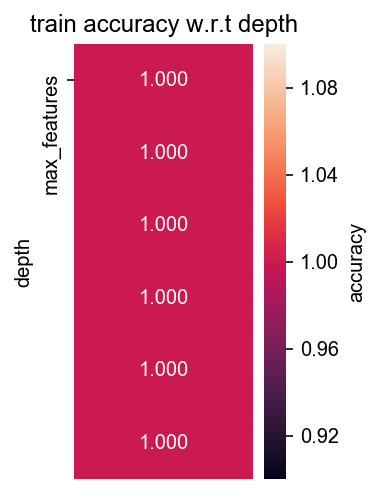

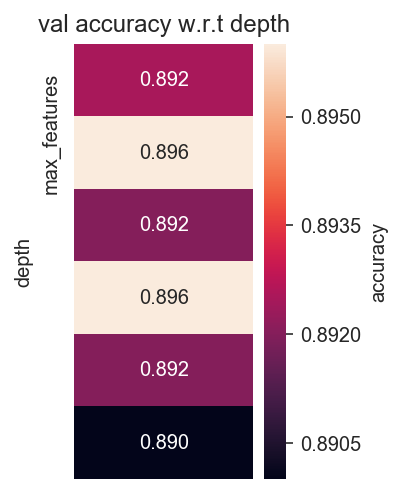

In [10]:
train_acc = rfGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramfeat)

val_acc = rfGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramfeat)

In [11]:
maxfeat = rfGSCV.best_params_['max_features']
val_acc = rfGSCV.score(X_test, Y_test)
train_acc = rfGSCV.score(X_train_val, Y_train_val)
optimal_classifier = RandomForestClassifier(max_features = maxfeat, n_estimators=1024)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxfeat)

1.0
0.901
0.900875
2


## LETTER -- DECISION TREE -- 20:80 SPLIT

In [12]:
D_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'max_depth':D_list}
dtree = DecisionTreeClassifier(criterion='entropy')
treeGSCV = GridSearchCV(dtree, paramlist, cv=5, return_train_score=True)
treeGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

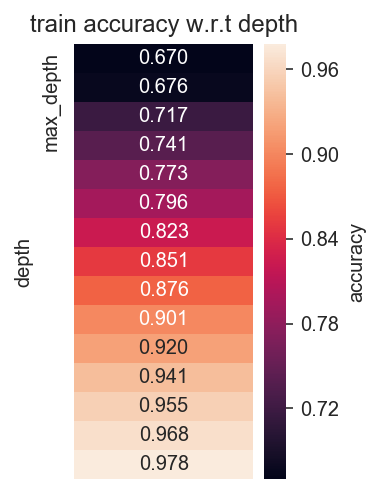

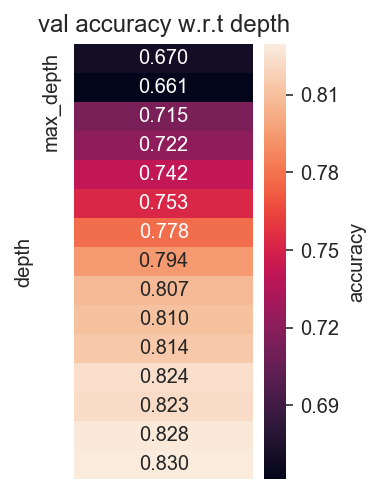

In [13]:
train_acc = treeGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = treeGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [14]:
maxdepth = treeGSCV.best_params_['max_depth']
val_acc = treeGSCV.score(X_test, Y_test)
train_acc = treeGSCV.score(X_train_val, Y_train_val)
optimal_classifier = DecisionTreeClassifier(criterion='entropy', max_depth = maxdepth)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxdepth)

0.98
0.859
0.851
15


## LETTER -- KNN -- 20:80 SPLIT

In [15]:
k_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'n_neighbors':k_list}
knn = KNeighborsClassifier()
knnGSCV = GridSearchCV(knn, paramlist, cv=5, return_train_score=True)
knnGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

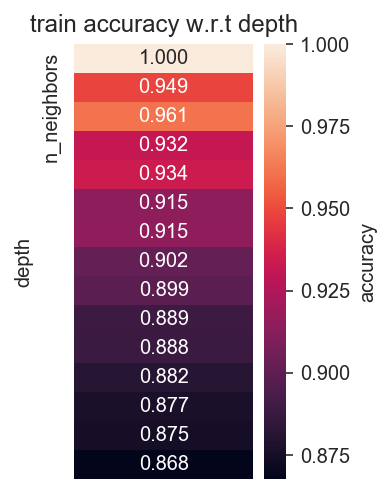

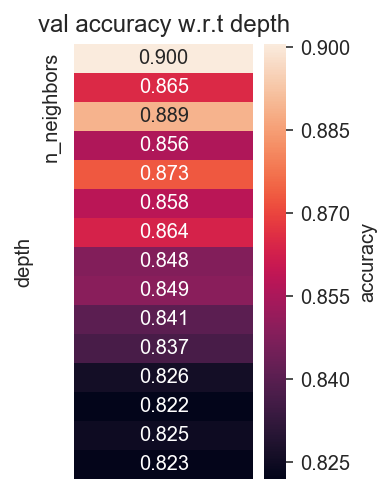

In [16]:
train_acc = knnGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = knnGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [17]:
bestk = knnGSCV.best_params_['n_neighbors']
val_acc = knnGSCV.score(X_test, Y_test)
train_acc = knnGSCV.score(X_train_val, Y_train_val)
optimal_classifier = KNeighborsClassifier(bestk)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(bestk)

1.0
0.91125
0.91125
1


## LETTER -- RANDOM FOREST -- 50:50 SPLIT

In [18]:
X_train_val = X[:int(0.5*len(X))] # Get features from train + val set.
X_test      = X[int(0.5*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.5*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.5*len(Y)):] # Get labels from test set.
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(5000, 15) (5000, 15) (5000,) (5000,)


In [19]:
feat_set = [1,2,4,6,8,12]
paramlist = {'max_features':feat_set}

rfc = RandomForestClassifier(max_features=paramlist, n_estimators=1024)
rfGSCV = GridSearchCV(rfc, paramlist, cv=5, return_train_score=True)
rfGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None,
            max_features={'max_features': [1, 2, 4, 6, 8, 12]},
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1024, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

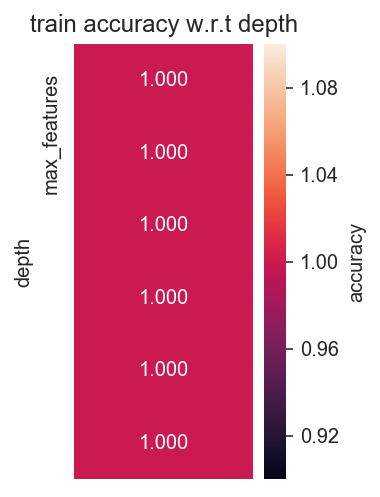

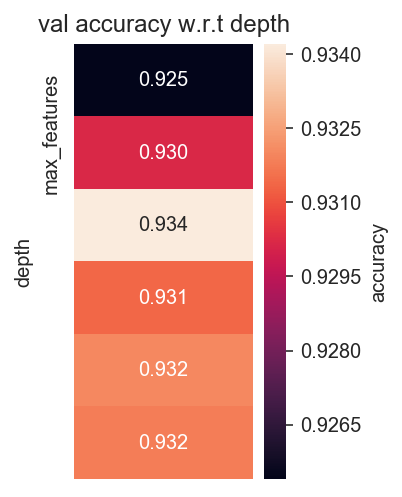

In [20]:
train_acc = rfGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = rfGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [21]:
maxfeat = rfGSCV.best_params_['max_features']
val_acc = rfGSCV.score(X_test, Y_test)
train_acc = rfGSCV.score(X_train_val, Y_train_val)
optimal_classifier = RandomForestClassifier(max_features = maxfeat, n_estimators=1024)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxfeat)

1.0
0.942
0.9416
4


## LETTER -- DECISION TREE -- 50:50 SPLIT

In [22]:
D_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'max_depth':D_list}
dtree = DecisionTreeClassifier(criterion='entropy')
treeGSCV = GridSearchCV(dtree, paramlist, cv=5, return_train_score=True)
treeGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

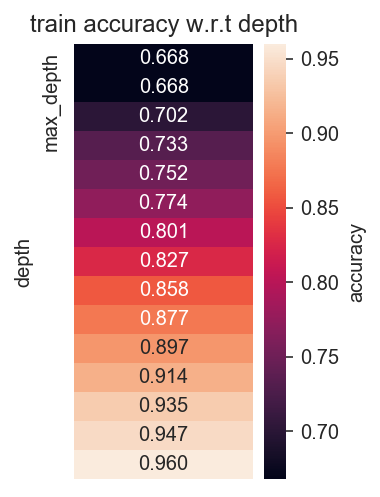

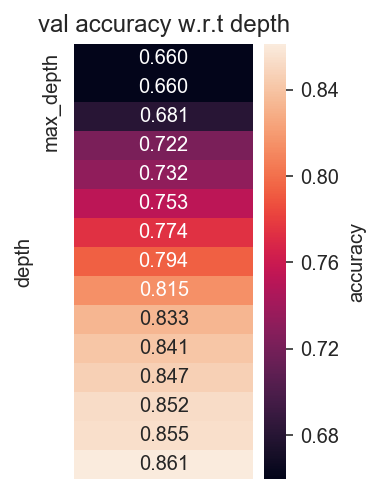

In [23]:
train_acc = treeGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = treeGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [24]:
maxdepth = treeGSCV.best_params_['max_depth']
val_acc = treeGSCV.score(X_test, Y_test)
train_acc = treeGSCV.score(X_train_val, Y_train_val)
optimal_classifier = DecisionTreeClassifier(criterion='entropy', max_depth = maxdepth)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxdepth)

0.9654
0.8772
0.8762
15


## LETTER --  KNN -- 50:50 SPLIT

In [25]:
k_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'n_neighbors':k_list}
knn = KNeighborsClassifier()
knnGSCV = GridSearchCV(knn, paramlist, cv=5, return_train_score=True)
knnGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

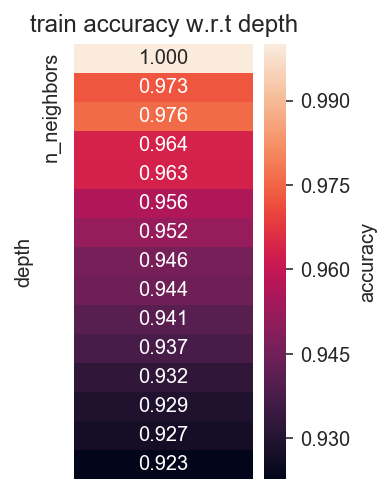

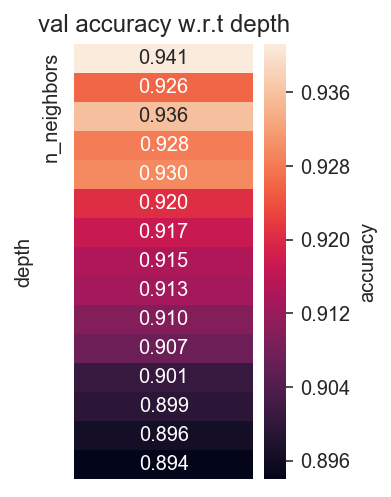

In [26]:
train_acc = knnGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = knnGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [27]:
bestk = knnGSCV.best_params_['n_neighbors']
val_acc = knnGSCV.score(X_test, Y_test)
train_acc = knnGSCV.score(X_train_val, Y_train_val)
optimal_classifier = KNeighborsClassifier(bestk)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(bestk)

1.0
0.9464
0.9464
1


## LETTER -- RANDOM FOREST -- 80:20 SPLIT

In [28]:
X_train_val = X[:int(0.8*len(X))] # Get features from train + val set.
X_test      = X[int(0.8*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(8000, 15) (2000, 15) (8000,) (2000,)


In [29]:
feat_set = [1,2,4,6,8,12]
paramlist = {'max_features':feat_set}

rfc = RandomForestClassifier(max_features=paramlist, n_estimators=1024, random_state=0)
rfGSCV = GridSearchCV(rfc, paramlist, cv=5, return_train_score=True)
rfGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None,
            max_features={'max_features': [1, 2, 4, 6, 8, 12]},
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1024, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

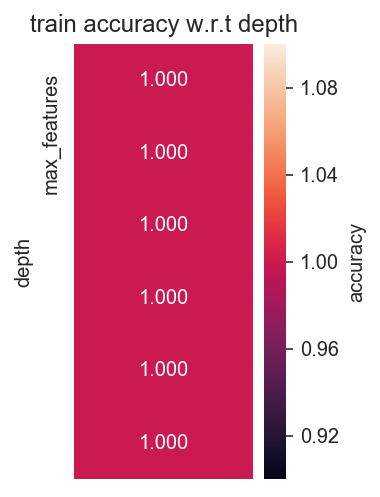

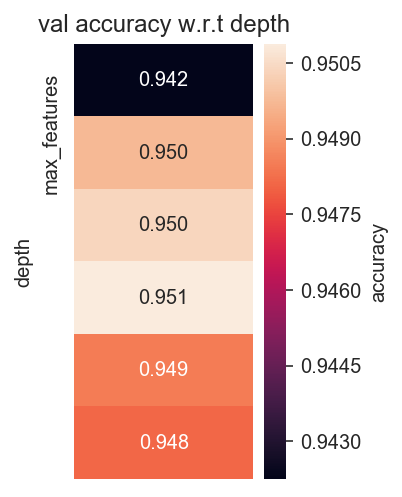

In [30]:
train_acc = rfGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = rfGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [31]:
maxfeat = rfGSCV.best_params_['max_features']
val_acc = rfGSCV.score(X_test, Y_test)
train_acc = rfGSCV.score(X_train_val, Y_train_val)
optimal_classifier = RandomForestClassifier(max_features = maxfeat, n_estimators=1024)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxfeat)

1.0
0.9595
0.956
6


## LETTER -- DECISION TREE -- 80:20 SPLIT

In [32]:
D_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'max_depth':D_list}
dtree = DecisionTreeClassifier(criterion='entropy')
treeGSCV = GridSearchCV(dtree, paramlist, cv=5, return_train_score=True)
treeGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

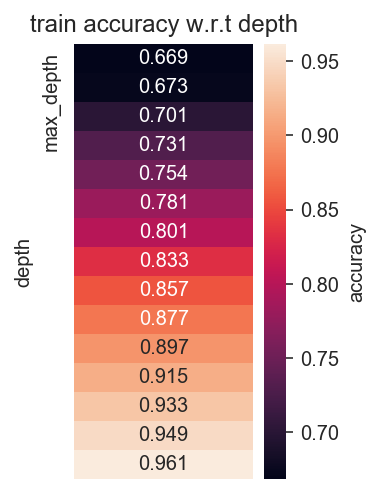

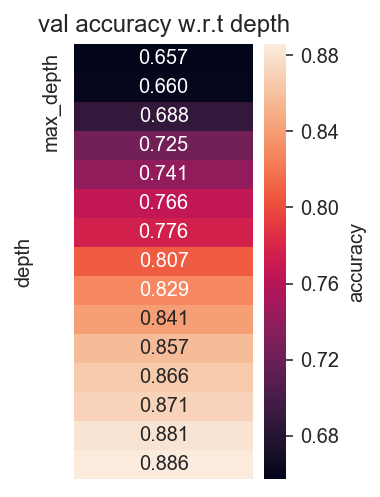

In [33]:
train_acc = treeGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = treeGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [34]:
maxdepth = treeGSCV.best_params_['max_depth']
val_acc = treeGSCV.score(X_test, Y_test)
train_acc = treeGSCV.score(X_train_val, Y_train_val)
optimal_classifier = DecisionTreeClassifier(criterion='entropy', max_depth = maxdepth)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxdepth)

0.971875
0.9085
0.9085
15


## LETTER -- KNN -- 80:20 SPLIT

In [35]:
k_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'n_neighbors':k_list}
knn = KNeighborsClassifier()
knnGSCV = GridSearchCV(knn, paramlist, cv=5, return_train_score=True)
knnGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

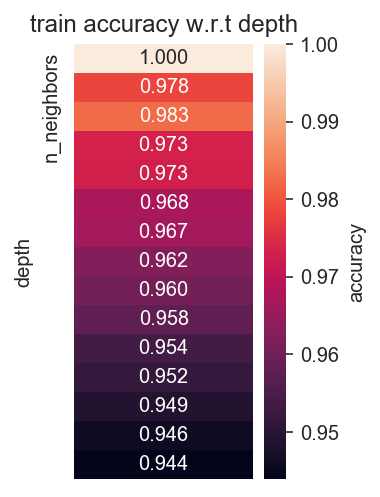

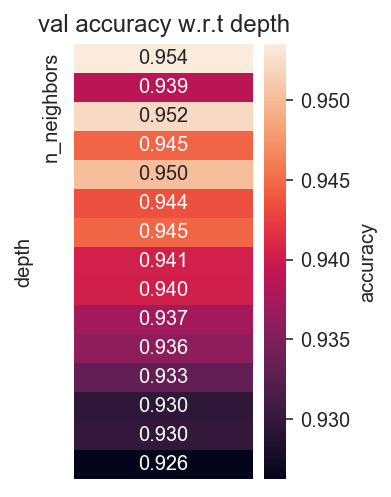

In [36]:
train_acc = knnGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = knnGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [37]:
bestk = knnGSCV.best_params_['n_neighbors']
val_acc = knnGSCV.score(X_test, Y_test)
train_acc = knnGSCV.score(X_train_val, Y_train_val)
optimal_classifier = KNeighborsClassifier(bestk)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(bestk)

1.0
0.956
0.956
1


## DEFAULT OF CREDIT CARD CLIENTS DATASET

In [38]:
file_handler2 = open("creditcarddata.csv", "r")
data2 = pd.read_csv(file_handler2, sep = ",")

In [39]:
data2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [40]:
credit = data2.values

In [41]:
np.random.shuffle(credit)
X = credit[:10000, 0:-1]
Y = credit[:10000, -1] 
print(credit.shape)
print(X.shape, Y.shape)

(30000, 24)
(10000, 23) (10000,)


## CREDIT -- RANDOM FOREST -- 20:80 SPLIT

In [42]:
X_train_val = X[:int(0.2*len(X))] # Get features from train + val set.
X_test      = X[int(0.2*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.2*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.2*len(Y)):] # Get labels from test set.
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(2000, 23) (8000, 23) (2000,) (8000,)


In [43]:
feat_set = [1,2,4,6,8,12,16,20]
paramlist = {'max_features':feat_set}

rfc = RandomForestClassifier(max_features=paramlist, n_estimators=1024)
rfGSCV = GridSearchCV(rfc, paramlist, cv=5, return_train_score=True)
rfGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None,
            max_features={'max_features': [1, 2, 4, 6, 8, 12, 16, 20]},
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1024, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12, 16, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

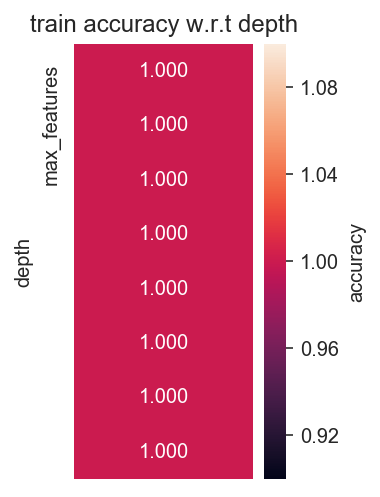

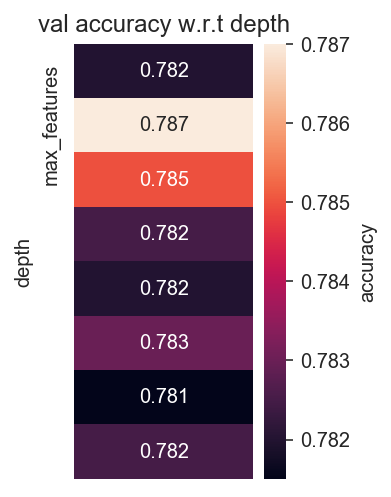

In [44]:
train_acc = rfGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = rfGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [45]:
maxfeat = rfGSCV.best_params_['max_features']
val_acc = rfGSCV.score(X_test, Y_test)
train_acc = rfGSCV.score(X_train_val, Y_train_val)
optimal_classifier = RandomForestClassifier(max_features = maxfeat, n_estimators=1024)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxfeat)

0.9995
0.80875
0.809625
2


## CREDIT -- DECISION TREE -- 20:80 SPLIT

In [46]:
D_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'max_depth':D_list}
dtree = DecisionTreeClassifier(criterion='entropy')
treeGSCV = GridSearchCV(dtree, paramlist, cv=5, return_train_score=True)
treeGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

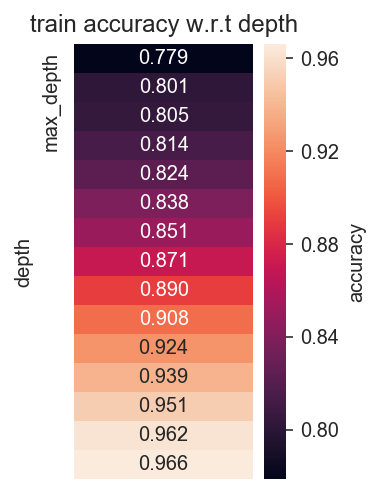

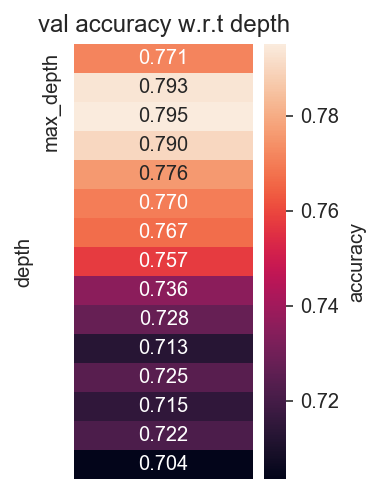

In [47]:
train_acc = treeGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = treeGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [48]:
maxdepth = treeGSCV.best_params_['max_depth']
val_acc = treeGSCV.score(X_test, Y_test)
train_acc = treeGSCV.score(X_train_val, Y_train_val)
optimal_classifier = DecisionTreeClassifier(criterion='entropy', max_depth = maxdepth)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxdepth)

0.803
0.822625
0.822625
3


## CREDIT -- KNN -- 20:80 SPLIT

In [49]:
k_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'n_neighbors':k_list}
knn = KNeighborsClassifier()
knnGSCV = GridSearchCV(knn, paramlist, cv=5, return_train_score=True)
knnGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

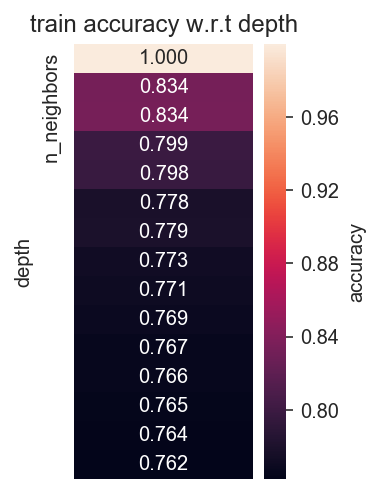

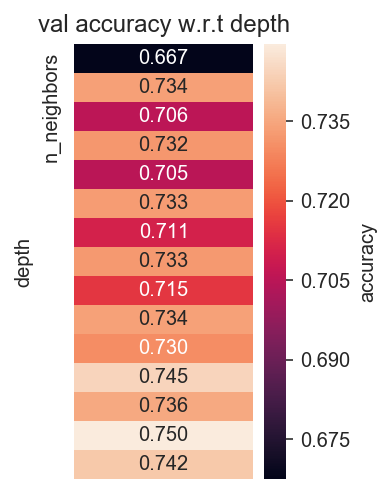

In [50]:
train_acc = knnGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = knnGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [51]:
bestk = knnGSCV.best_params_['n_neighbors']
val_acc = knnGSCV.score(X_test, Y_test)
train_acc = knnGSCV.score(X_train_val, Y_train_val)
optimal_classifier = KNeighborsClassifier(bestk)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(bestk)

0.7685
0.76825
0.76825
14


## CREDIT -- RANDOM FOREST -- 50:50 SPLIT

In [52]:
X_train_val = X[:int(0.5*len(X))] # Get features from train + val set.
X_test      = X[int(0.5*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.5*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.5*len(Y)):] # Get labels from test set.
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(5000, 23) (5000, 23) (5000,) (5000,)


In [53]:
feat_set = [1,2,4,6,8,12,16,20]
paramlist = {'max_features':feat_set}

rfc = RandomForestClassifier(max_features=paramlist, n_estimators=1024)
rfGSCV = GridSearchCV(rfc, paramlist, cv=5, return_train_score=True)
rfGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None,
            max_features={'max_features': [1, 2, 4, 6, 8, 12, 16, 20]},
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1024, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12, 16, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

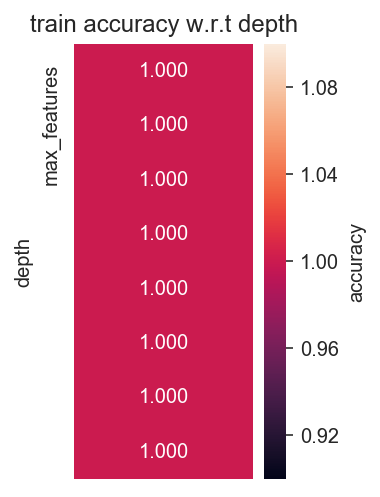

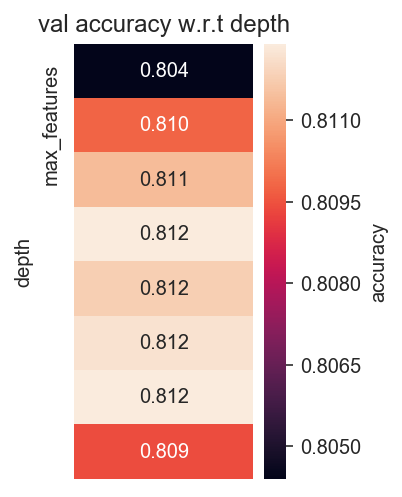

In [54]:
train_acc = rfGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = rfGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [55]:
maxfeat = rfGSCV.best_params_['max_features']
val_acc = rfGSCV.score(X_test, Y_test)
train_acc = rfGSCV.score(X_train_val, Y_train_val)
optimal_classifier = RandomForestClassifier(max_features = maxfeat, n_estimators=1024)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxfeat)

0.9998
0.814
0.8144
6


## CREDIT -- DECISION TREE -- 50:50 SPLIT

In [56]:
D_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'max_depth':D_list}
dtree = DecisionTreeClassifier(criterion='entropy')
treeGSCV = GridSearchCV(dtree, paramlist, cv=5, return_train_score=True)
treeGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

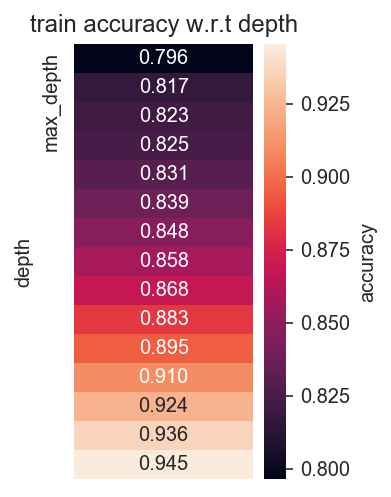

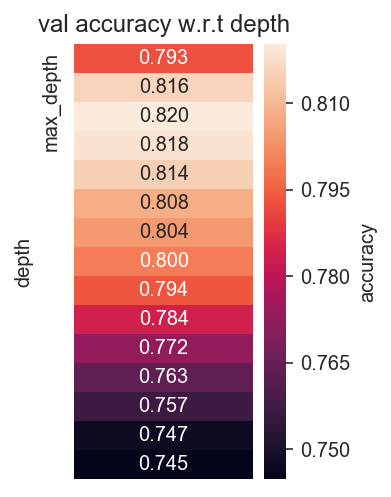

In [57]:
train_acc = treeGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = treeGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [58]:
maxdepth = treeGSCV.best_params_['max_depth']
val_acc = treeGSCV.score(X_test, Y_test)
train_acc = treeGSCV.score(X_train_val, Y_train_val)
optimal_classifier = DecisionTreeClassifier(criterion='entropy', max_depth = maxdepth)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxdepth)

0.8228
0.8218
0.8218
3


## CREDIT -- KNN -- 50:50 SPLIT

In [59]:
k_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'n_neighbors':k_list}
knn = KNeighborsClassifier()
knnGSCV = GridSearchCV(knn, paramlist, cv=5, return_train_score=True)
knnGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

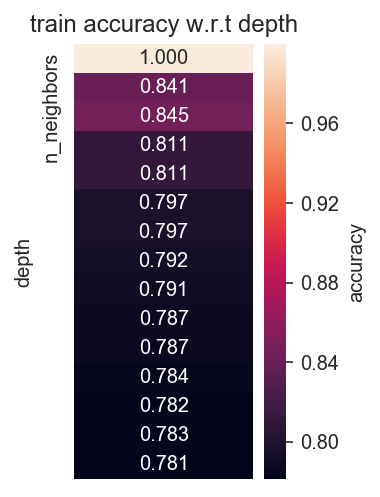

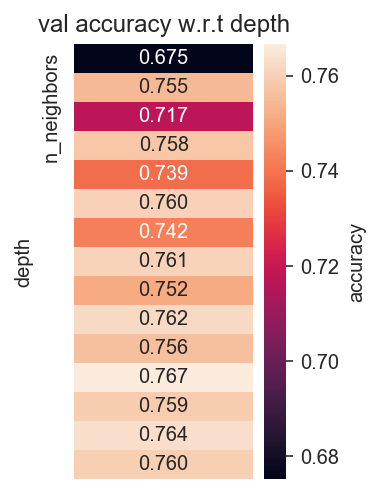

In [60]:
train_acc = knnGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = knnGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [61]:
bestk = knnGSCV.best_params_['n_neighbors']
val_acc = knnGSCV.score(X_test, Y_test)
train_acc = knnGSCV.score(X_train_val, Y_train_val)
optimal_classifier = KNeighborsClassifier(bestk)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(bestk)

0.784
0.7704
0.7704
12


## CREDIT -- RANDOM FOREST -- 80:20 SPLIT

In [62]:
X_train_val = X[:int(0.8*len(X))] # Get features from train + val set.
X_test      = X[int(0.8*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(8000, 23) (2000, 23) (8000,) (2000,)


In [63]:
feat_set = [1,2,4,6,8,12,16,20]
paramlist = {'max_features':feat_set}

rfc = RandomForestClassifier(max_features=paramlist, n_estimators=1024)
rfGSCV = GridSearchCV(rfc, paramlist, cv=5, return_train_score=True)
rfGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None,
            max_features={'max_features': [1, 2, 4, 6, 8, 12, 16, 20]},
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1024, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12, 16, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

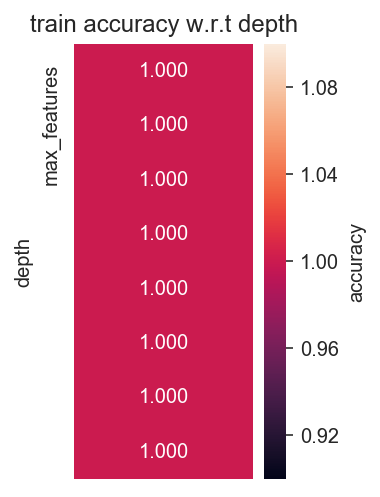

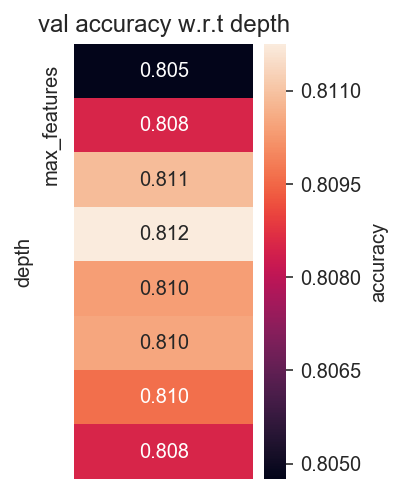

In [64]:
train_acc = rfGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = rfGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [65]:
maxfeat = rfGSCV.best_params_['max_features']
val_acc = rfGSCV.score(X_test, Y_test)
train_acc = rfGSCV.score(X_train_val, Y_train_val)
optimal_classifier = RandomForestClassifier(max_features = maxfeat, n_estimators=1024)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxfeat)

0.999625
0.8245
0.823
6


## CREDIT -- DECISION TREE -- 80:20 SPLIT

In [66]:
D_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'max_depth':D_list}
dtree = DecisionTreeClassifier(criterion='entropy')
treeGSCV = GridSearchCV(dtree, paramlist, cv=5, return_train_score=True)
treeGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

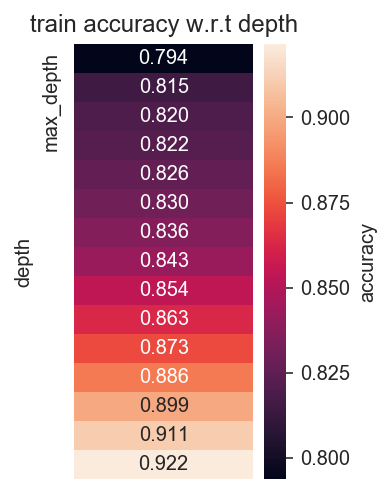

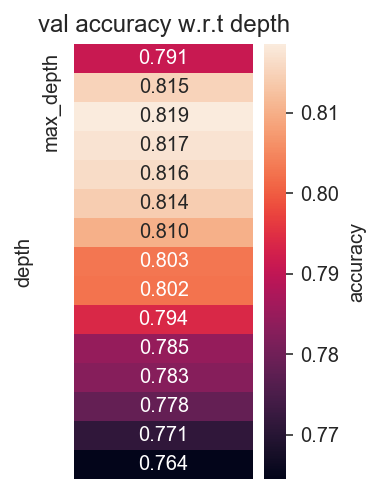

In [67]:
train_acc = treeGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = treeGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [68]:
maxdepth = treeGSCV.best_params_['max_depth']
val_acc = treeGSCV.score(X_test, Y_test)
train_acc = treeGSCV.score(X_train_val, Y_train_val)
optimal_classifier = DecisionTreeClassifier(criterion='entropy', max_depth = maxdepth)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxdepth)

0.820375
0.8295
0.8295
3


## CREDIT -- KNN -- 80:20 SPLIT

In [69]:
k_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'n_neighbors':k_list}
knn = KNeighborsClassifier()
knnGSCV = GridSearchCV(knn, paramlist, cv=5, return_train_score=True)
knnGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

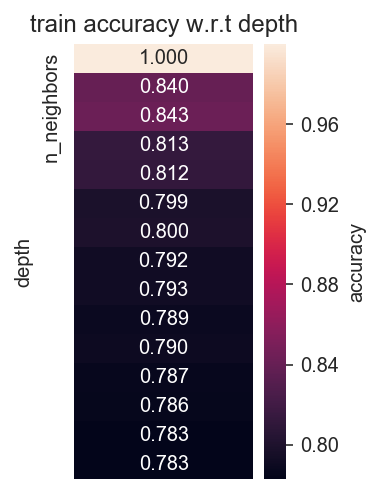

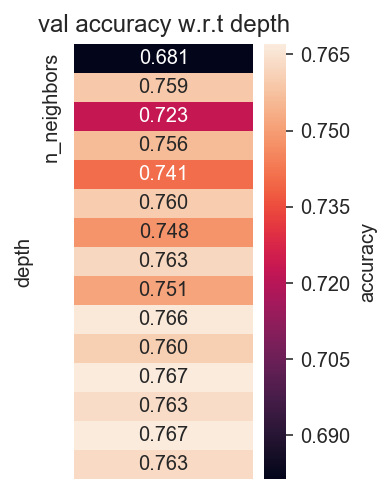

In [70]:
train_acc = knnGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = knnGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [71]:
bestk = knnGSCV.best_params_['n_neighbors']
val_acc = knnGSCV.score(X_test, Y_test)
train_acc = knnGSCV.score(X_train_val, Y_train_val)
optimal_classifier = KNeighborsClassifier(bestk)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(bestk)

0.785875
0.7815
0.7815
14


## COVER TYPE DATASET

In [72]:
covtype = np.loadtxt('covtype.data', delimiter = ',')

In [73]:
np.random.shuffle(covtype)
X = covtype[:10000, 0:-1]
Y = covtype[:10000, -1] 
print(covtype.shape)
print(X.shape, Y.shape)

(581012, 55)
(10000, 54) (10000,)


## COVER TYPE -- RANDOM FOREST -- 20:80 SPLIT

In [74]:
X_train_val = X[:int(0.2*len(X))] # Get features from train + val set.
X_test      = X[int(0.2*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.2*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.2*len(Y)):] # Get labels from test set.
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(2000, 54) (8000, 54) (2000,) (8000,)


In [75]:
feat_set = [1,2,4,6,8,12,16,20,24,30,36,42,50]
paramlist = {'max_features':feat_set}

rfc = RandomForestClassifier(max_features=paramlist, n_estimators=1024)
rfGSCV = GridSearchCV(rfc, paramlist, cv=5, return_train_score=True)
rfGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None,
            max_features={'max_features': [1, 2, 4, 6, 8, 12, 16, 20, 24, 30, 36, 42, 50]},
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=Non...imators=1024, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12, 16, 20, 24, 30, 36, 42, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

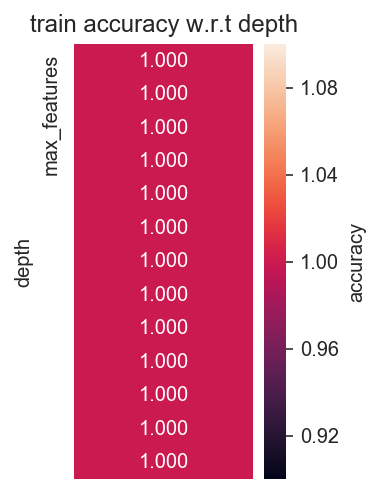

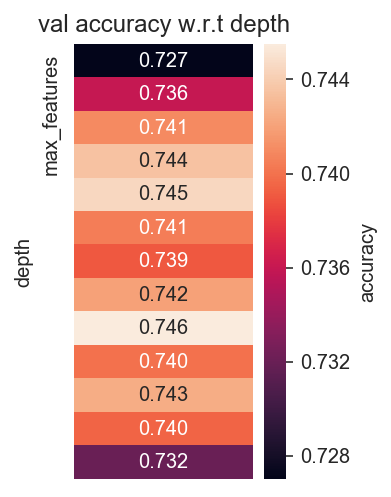

In [76]:
train_acc = rfGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = rfGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [77]:
maxfeat = rfGSCV.best_params_['max_features']
val_acc = rfGSCV.score(X_test, Y_test)
train_acc = rfGSCV.score(X_train_val, Y_train_val)
optimal_classifier = RandomForestClassifier(max_features = maxfeat, n_estimators=1024)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxfeat)

1.0
0.7425
0.7435
24


## COVER TYPE -- DECISION TREE -- 20:80 SPLIT

In [78]:
D_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'max_depth':D_list}
dtree = DecisionTreeClassifier(criterion='entropy')
treeGSCV = GridSearchCV(dtree, paramlist, cv=5, return_train_score=True)
treeGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

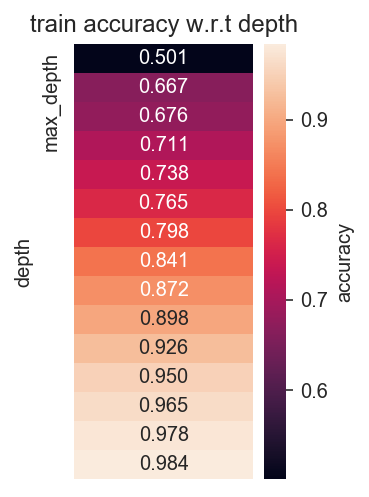

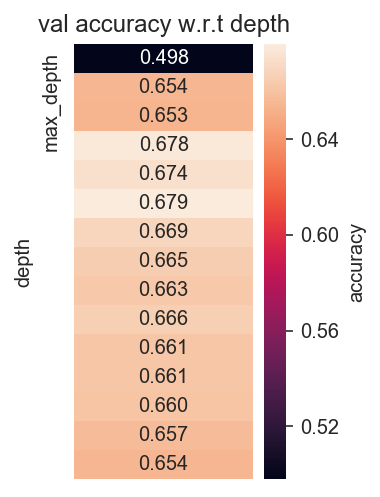

In [79]:
train_acc = treeGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = treeGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [80]:
maxdepth = treeGSCV.best_params_['max_depth']
val_acc = treeGSCV.score(X_test, Y_test)
train_acc = treeGSCV.score(X_train_val, Y_train_val)
optimal_classifier = DecisionTreeClassifier(criterion='entropy', max_depth = maxdepth)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxdepth)

0.7615
0.69525
0.696625
6


## COVER TYPE -- KNN -- 20:80 SPLIT

In [81]:
k_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'n_neighbors':k_list}
knn = KNeighborsClassifier()
knnGSCV = GridSearchCV(knn, paramlist, cv=5, return_train_score=True)
knnGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

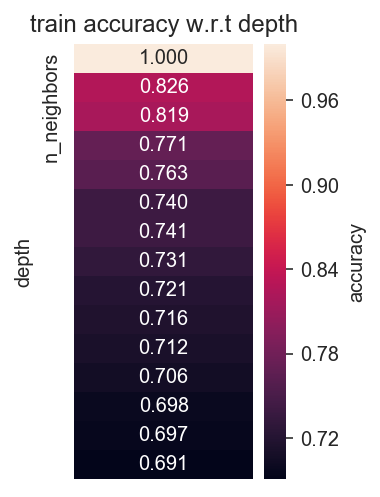

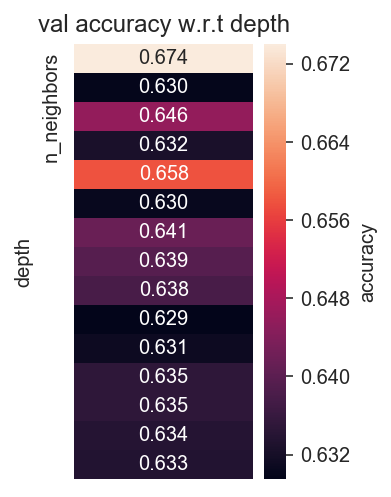

In [82]:
train_acc = knnGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = knnGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [83]:
bestk = knnGSCV.best_params_['n_neighbors']
val_acc = knnGSCV.score(X_test, Y_test)
train_acc = knnGSCV.score(X_train_val, Y_train_val)
optimal_classifier = KNeighborsClassifier(bestk)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(bestk)

1.0
0.67225
0.67225
1


## COVER TYPE -- RANDOM FOREST -- 50:50 SPLIT

In [84]:
X_train_val = X[:int(0.5*len(X))] # Get features from train + val set.
X_test      = X[int(0.5*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.5*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.5*len(Y)):] # Get labels from test set.
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(5000, 54) (5000, 54) (5000,) (5000,)


In [85]:
feat_set = [1,2,4,6,8,12,16,20,24,30,36,42,50]
paramlist = {'max_features':feat_set}

rfc = RandomForestClassifier(max_features=paramlist, n_estimators=1024)
rfGSCV = GridSearchCV(rfc, paramlist, cv=5, return_train_score=True)
rfGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None,
            max_features={'max_features': [1, 2, 4, 6, 8, 12, 16, 20, 24, 30, 36, 42, 50]},
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=Non...imators=1024, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12, 16, 20, 24, 30, 36, 42, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

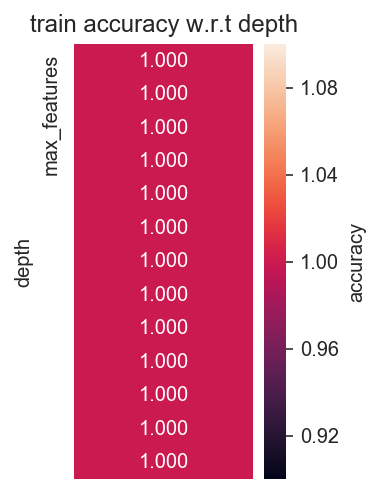

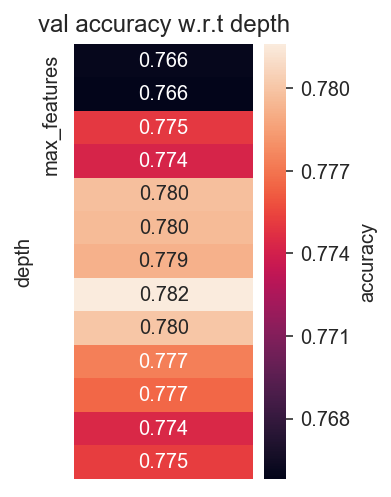

In [86]:
train_acc = rfGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = rfGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [87]:
maxfeat = rfGSCV.best_params_['max_features']
val_acc = rfGSCV.score(X_test, Y_test)
train_acc = rfGSCV.score(X_train_val, Y_train_val)
optimal_classifier = RandomForestClassifier(max_features = maxfeat, n_estimators=1024)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxfeat)

1.0
0.7932
0.7936
20


## COVER TYPE -- DECISION TREE -- 50:50 SPLIT

In [88]:
D_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'max_depth':D_list}
dtree = DecisionTreeClassifier(criterion='entropy')
treeGSCV = GridSearchCV(dtree, paramlist, cv=5, return_train_score=True)
treeGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

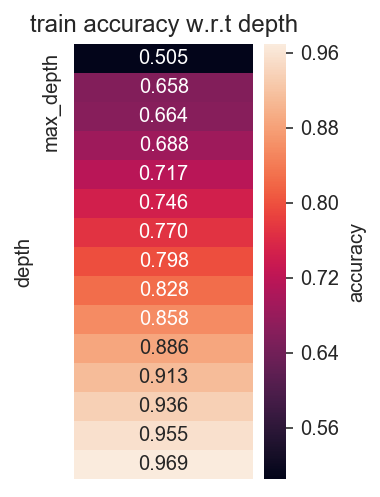

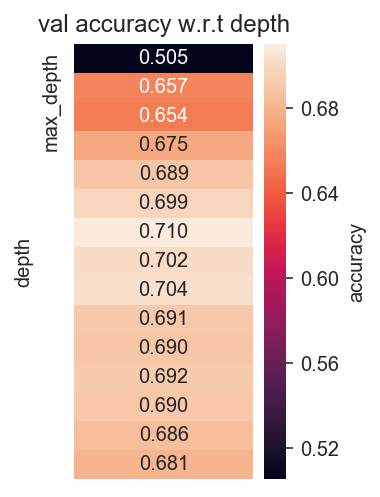

In [89]:
train_acc = treeGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = treeGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [90]:
maxdepth = treeGSCV.best_params_['max_depth']
val_acc = treeGSCV.score(X_test, Y_test)
train_acc = treeGSCV.score(X_train_val, Y_train_val)
optimal_classifier = DecisionTreeClassifier(criterion='entropy', max_depth = maxdepth)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxdepth)

0.7596
0.6982
0.6984
7


## COVER TYPE -- KNN -- 50:50 SPLIT

In [91]:
k_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'n_neighbors':k_list}
knn = KNeighborsClassifier()
knnGSCV = GridSearchCV(knn, paramlist, cv=5, return_train_score=True)
knnGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

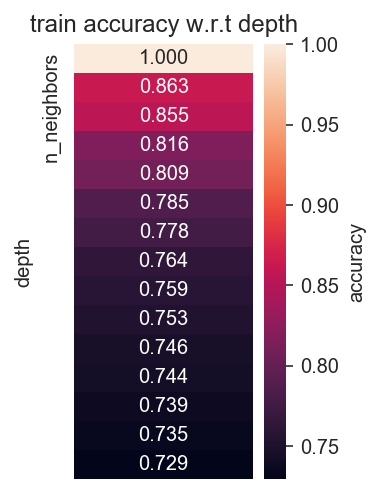

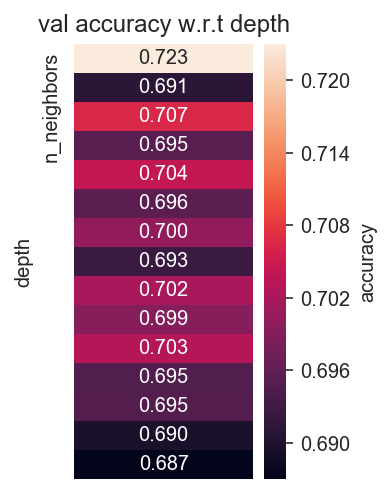

In [92]:
train_acc = knnGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = knnGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [93]:
bestk = knnGSCV.best_params_['n_neighbors']
val_acc = knnGSCV.score(X_test, Y_test)
train_acc = knnGSCV.score(X_train_val, Y_train_val)
optimal_classifier = KNeighborsClassifier(bestk)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(bestk)

1.0
0.7494
0.7494
1


## COVER TYPE -- RANDOM FOREST -- 80:20 SPLIT

In [94]:
X_train_val = X[:int(0.8*len(X))] # Get features from train + val set.
X_test      = X[int(0.8*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(8000, 54) (2000, 54) (8000,) (2000,)


In [95]:
feat_set = [1,2,4,6,8,12,16,20,24,30,36,42,50]
paramlist = {'max_features':feat_set}

rfc = RandomForestClassifier(max_features=paramlist, n_estimators=1024)
rfGSCV = GridSearchCV(rfc, paramlist, cv=5, return_train_score=True)
rfGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None,
            max_features={'max_features': [1, 2, 4, 6, 8, 12, 16, 20, 24, 30, 36, 42, 50]},
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=Non...imators=1024, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 4, 6, 8, 12, 16, 20, 24, 30, 36, 42, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

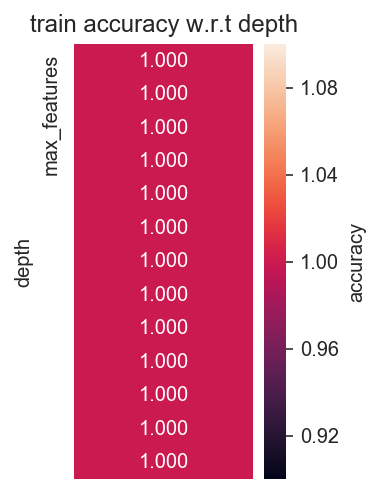

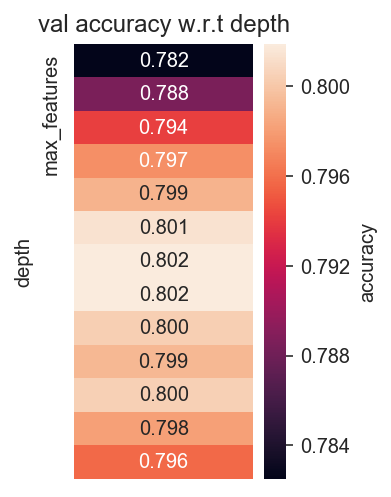

In [96]:
train_acc = rfGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = rfGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [97]:
maxfeat = rfGSCV.best_params_['max_features']
val_acc = rfGSCV.score(X_test, Y_test)
train_acc = rfGSCV.score(X_train_val, Y_train_val)
optimal_classifier = RandomForestClassifier(max_features = maxfeat, n_estimators=1024)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxfeat)

1.0
0.8175
0.8175
16


## COVER TYPE -- DECISION TREE -- 80:20 SPLIT

In [98]:
D_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'max_depth':D_list}
dtree = DecisionTreeClassifier(criterion='entropy')
treeGSCV = GridSearchCV(dtree, paramlist, cv=5, return_train_score=True)
treeGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

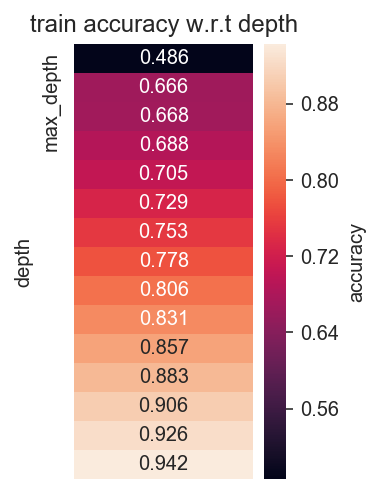

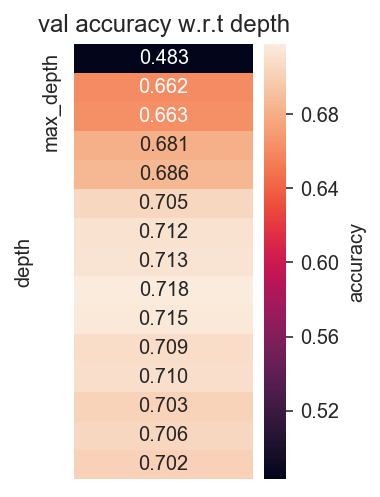

In [99]:
train_acc = treeGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = treeGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [100]:
maxdepth = treeGSCV.best_params_['max_depth']
val_acc = treeGSCV.score(X_test, Y_test)
train_acc = treeGSCV.score(X_train_val, Y_train_val)
optimal_classifier = DecisionTreeClassifier(criterion='entropy', max_depth = maxdepth)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(maxdepth)

0.789625
0.7175
0.713
9


## COVER TYPE -- KNN -- 80:20 SPLIT

In [101]:
k_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
paramlist = {'n_neighbors':k_list}
knn = KNeighborsClassifier()
knnGSCV = GridSearchCV(knn, paramlist, cv=5, return_train_score=True)
knnGSCV.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

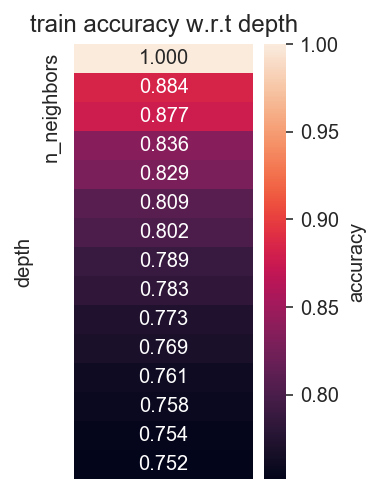

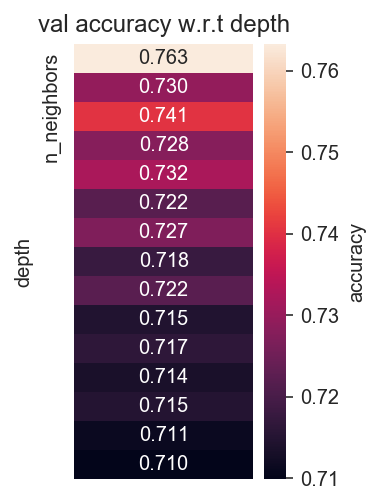

In [102]:
train_acc = knnGSCV.cv_results_['mean_train_score']
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', paramlist)

val_acc = knnGSCV.cv_results_['mean_test_score']
draw_heatmap_linear(val_acc.reshape(-1,1), 'val accuracy', paramlist)

In [103]:
bestk = knnGSCV.best_params_['n_neighbors']
val_acc = knnGSCV.score(X_test, Y_test)
train_acc = knnGSCV.score(X_train_val, Y_train_val)
optimal_classifier = KNeighborsClassifier(bestk)
optimal_classifier.fit(X_train_val, Y_train_val)
test_acc = optimal_classifier.score(X_test, Y_test)
print(train_acc)
print(val_acc)
print(test_acc)
print(bestk)

1.0
0.793
0.793
1
